<img src='http://arch.ut.ac.ir/documents/70819125/2017cca1-b036-41de-bcce-f7376699275b' alt="UT logo" width="120" height="120" align="left">

<h1 align=center><font size=5> <b><i>Machine Learning(Fall 2020)</b><br>Task 3</i></font></h1>

#### In this notebook we want to become more familiar with data visualization and classify data with Logistic Regression.

# Section 1: MNIST Dataset
You can find information about the dataset and download it from [here](https://www.kaggle.com/oddrationale/mnist-in-csv)(please download train dataset).


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## DATA IS ALREADY SHUFFLED!!!!!!
mnist = fetch_openml('mnist_784')

## Visualize Dataset
Define functions for each purpose:
1. plot a digit

<img src="images/digit.png" width="50" height="50">

2. plot a series of instances of each class

<img src="images/digits.png" width="300" height="300">
3. Plot a shifted digit

<img src="images/shift.png" width="300" height="70">

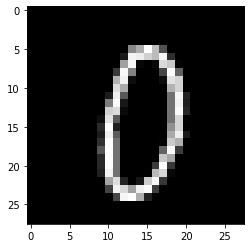

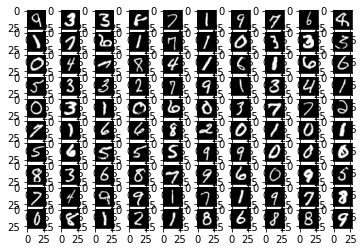

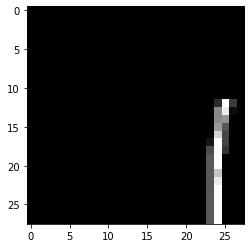

In [ ]:
from scipy.ndimage.interpolation import shift
import random
plt.imshow(mnist.data[random.randrange(1,70000)].reshape(28,28),cmap='gray')
plt.show()

f = 0
l = 10000
fig = plt.figure()
for i in range(10):
  for j in range(10):
    plt.subplot(10,10,i*10+j+1)
    plt.imshow(mnist.data[random.randrange(f+i,l+i)].reshape(28,28),cmap='gray')
plt.show

fig = plt.figure()
dx = 10
dy = 7
image = mnist.data[random.randrange(1,70000)].reshape((28,28))
shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
plt.imshow(shifted_image.reshape(28,28),cmap='gray')
plt.show()

## Classification
In this part, you should do a binary classification to predict if a digit is '4' or not. report the requests listed below:
1. Plot Confusion Matrix and ROC
2. Report Accuracy, Sensitivity, Specificity, Precision and Recall.
3. Plot Recall vs Precision for different thresholds (using sklearn.metrics.precision_recall_curve) like the figures below:

<img src="images/rec_vs_pre1 .png" width="300" height="100">
<img src="images/rec_vs_pre2 .png" width="320" height="300">


In [ ]:
import copy
mnist = fetch_openml('mnist_784')

from sklearn.model_selection import train_test_split
# import sklearn.metrics.precision_recall_curve
train_img1, test_img1, train_lbl1, test_lbl1 = train_test_split(
mnist.data, mnist.target, test_size=1/7.0, random_state=0)

train_lbl = copy.deepcopy(train_lbl1)
test_lbl = copy.deepcopy(test_lbl1)

train_lbl[train_lbl!='4'] = '0'
train_lbl[train_lbl =='4'] = '1'

test_lbl[test_lbl!='4'] = '0'
test_lbl[test_lbl =='4'] = '1'

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[8960   78]
 [  87  875]]
accuracy: 98.35000000000001
sensitivity: 90.95634095634095
specificity: 99.13697720734676
precision: 91.81532004197271


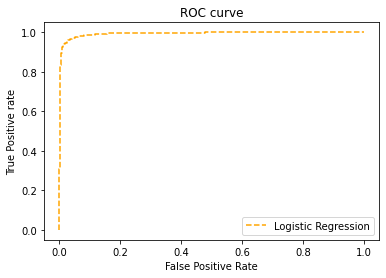

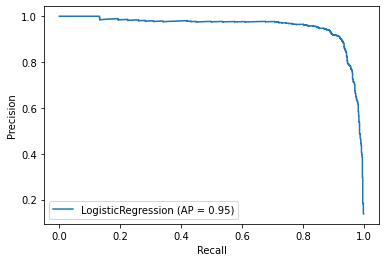

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

logisticRegr = LogisticRegression()
logisticRegr.fit(train_img, train_lbl)
predictions_probs = logisticRegr.predict_proba(test_img)
fpr, tpr, thresh = roc_curve(test_lbl, predictions_probs[:,1], pos_label='1')


predictions = logisticRegr.predict(test_img)
cm = confusion_matrix(test_lbl, predictions)
print(cm)
tn, fp, fn, tp = cm.ravel()

acc = (tp+tn)/(tn+fp+fn+tp)*100
sensitivity = tp/(tp+fn)*100 #recall
specificity = tn/(tn+fp)*100
precision = tp/(tp+fp)*100

print(f'accuracy: {acc}')
print(f'sensitivity: {sensitivity}')
print(f'specificity: {specificity}')
print(f'precision: {precision}')


# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

precision, recall, thresholds = precision_recall_curve(test_lbl, predictions_probs[:,1],  pos_label='1')

disp = plot_precision_recall_curve(logisticRegr, test_img, test_lbl)


# Section 2: Titanic Dataset

You can find information about the dataset and download it from [here](https://www.kaggle.com/c/titanic/data)(please download train dataset).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Cleaning Dataset
Do some process and answer to questions below:

1. Which columns have missing values?
2. How do you fill the missing values, and why do you use this approach?

1- Age coulumn

2- Missing age values are selected in a random manner based on a gaussian distribution with the mean and std equal to mean and std of people ages. Aftewards, ages are categorized into 7 distinct categories.

## Exploratory Data Analysis

Answer to these questions by plot relating figures:

1. Compare the age distribution for survivors and the deceased. Do you see any interesting points?
2. Compare the fare distribution for survivors and the deceased. Look at the features' description on Kaggle, is there any other feature that seems to be highly correlated to fare? Explain it.
3. Plot the survivors based on the embarked port. What do you see? Do you have any hypothesis? 
4. Plot data based on traveling alone and with family (you may need to merge 2 columns of data somehow).
5. Which gender was more likely to survive? Do you know why?

1- According to the figure, men in the range of 20 to 40 years old are survived the most.

3- It seems people who use embarkation port S are more survived.
5- It seems women are more survived than men.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Embarked')

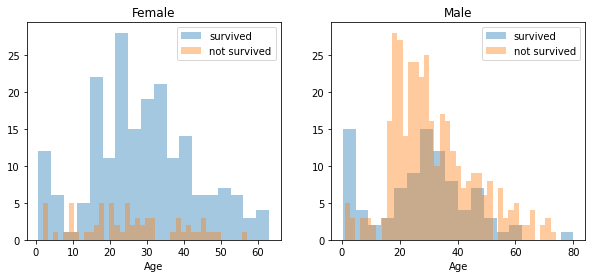

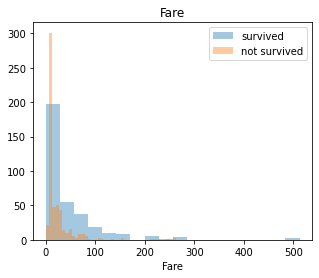

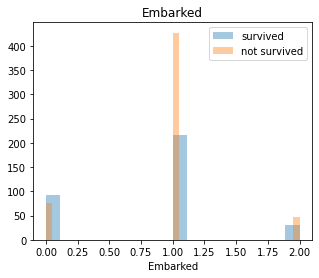

In [208]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

train_df = pd.read_csv("/content/drive/MyDrive/titanic.csv")
# train_df = pd.read_csv("train.csv")

train_df.info()

train_df.describe()

train_df.head(8)

total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

train_df.columns.values

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

fare = train_df['Fare']
fig1, axes1 = plt.subplots(nrows=1, ncols=1,figsize=(5, 4))
ax1 = sns.distplot(fare[train_df['Survived']==1], bins=18, label = survived, ax = axes1, kde = False)
ax1 = sns.distplot(fare[train_df['Survived']==0], bins=40, label = not_survived, ax = axes1, kde = False)
ax1.legend()
ax1.set_title('Fare')

embarked = train_df['Embarked']
embarked[embarked=='C'] = 0
embarked[embarked=='S'] = 1
embarked[embarked=='Q'] = 2
fig2, axes2 = plt.subplots(nrows=1, ncols=1,figsize=(5, 4))
ax2 = sns.distplot(embarked[train_df['Survived']==1], bins=18, label = survived, ax = axes2, kde = False)
ax2 = sns.distplot(embarked[train_df['Survived']==0], bins=40, label = not_survived, ax = axes2, kde = False)
ax2.legend()
ax2.set_title('Embarked')

## Classification
n this part, you should do a binary classification to predict if a passenger survives or not. report the requests listed below:
1. Plot Confusion Matrix and ROC
2. Report Accuracy, Sensitivity, Specificity, Precision, and Recall.
-------------------------------------------------------------------------------------------------------------------------------
* Like the explanation notebook, do the necessary preprocess transformation on the dataset and report what you have done.  You get a bonus mark if you use dimension reduction techniques.

Data is preprocessed as follows:
  1- passeneger id is droped because it is not a feature
  2- A new feature is added called "deck" which is the letter part of cabin column. A number is assigned to each letter; missing values are set to zero.
  3- Missing age values are selected in a random manner based on a gaussian distribution with the mean and std equal to average and std of people. Aftewards, ages are categorized into 7 distinct categories.
  4- Embark column has just two missing values. These values are replaced by most common embark.
  5- From the title column a new feature can be extracted. So as to different titles (e.g. Mr, Miss, Ms , ...) will get a numeric equivalent.
  6- Sex will transform to 0 and 1.
  7- Ticket column is removed because it seems it does not have useful information.
  8- Embark feature is mapped to numbers 0, 1, and 2.
  9- Fares are also are divided into 6 distinct categories.

  At the final stage, logistic regression is utilized for training the model. Moreover, 80% of the data are alocated to train and 20% for test purpose.

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
train_df = pd.read_csv("/content/drive/MyDrive/titanic_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/titanic_test.csv")

train_df = train_df.drop(['PassengerId'], axis=1)
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

train_df['Embarked'].describe()

common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

train_df.info()
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

train_df['Ticket'].describe()

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

train_df.head(10)

data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

X_test = test_df.drop("Survived", axis=1)
X_test = X_test.drop("PassengerId", axis=1)
Y_test = test_df["Survived"]

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:",recall_score(Y_test, Y_pred))

tn, fp, fn, tp = confusion_matrix(test_lbl, predictions).ravel()

acc = (tp+tn)/(tn+fp+fn+tp)*100
sensitivity = tp/(tp+fn)*100 #recall
specificity = tn/(tn+fp)*100
precision = tp/(tp+fp)*100

print(f'accuracy: {acc}')
print(f'sensitivity: {sensitivity}')
print(f'specificity: {specificity}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  713 non-null    int64  
 1   Pclass    713 non-null    int64  
 2   Name      713 non-null    object 
 3   Sex       713 non-null    object 
 4   Age       713 non-null    int64  
 5   SibSp     713 non-null    int64  
 6   Parch     713 non-null    int64  
 7   Ticket    713 non-null    object 
 8   Fare      713 non-null    float64
 9   Embarked  713 non-null    object 
 10  Deck      713 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 61.4+ KB
Precision: 0.734375
Recall: 0.746031746031746
accuracy: 98.35000000000001
sensitivity: 90.95634095634095
specificity: 99.13697720734676
